##Instructions
Create a Python notebook to answer all shown procedures, exercises and analysis in this section.

##Resources:

Download the following datasets:
- earthquakes-1.csv
- fb_stock_prices_2018.csv



##Procedures:

###9.1 Introduction to Matplotlib


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

earthquakes = pd.read_csv('/content/data/earthquakes.csv')
earthquakes['time'] = pd.to_datetime(earthquakes['time'], unit='ms')

####Line Plot

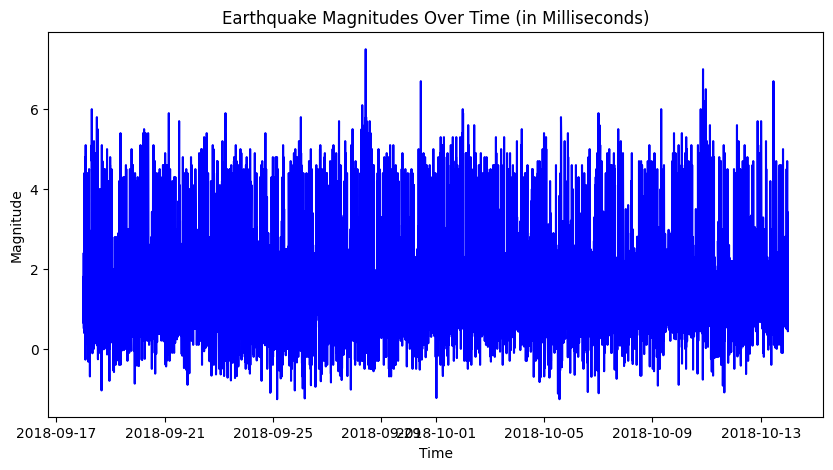

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(earthquakes['time'], earthquakes['mag'], color='blue')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitudes Over Time (in Milliseconds)')
plt.show()

<ipython-input-34-e3e4343e960d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  downsampled_line_plot = earthquakes.resample('D', on='time').mean()


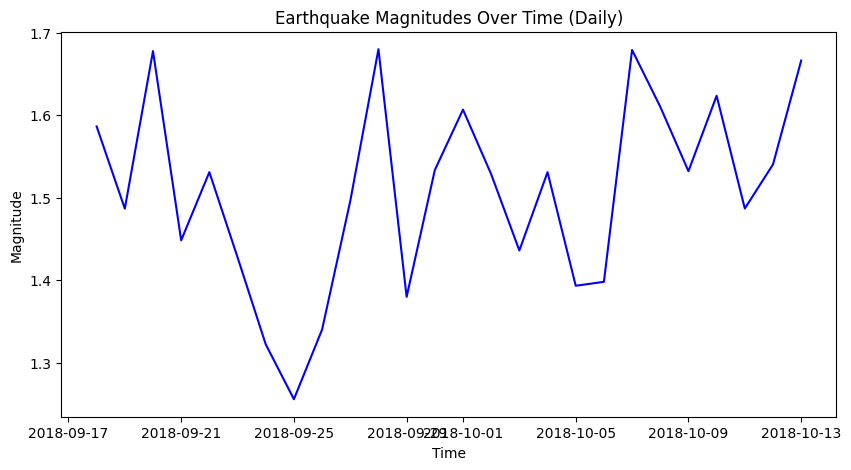

In [34]:
downsampled_line_plot = earthquakes.resample('D', on='time').mean()
plt.figure(figsize=(10, 5))
plt.plot(downsampled_line_plot.index, downsampled_line_plot['mag'], color='blue')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitudes Over Time (Daily)')
plt.show()

####Earthquake Scatter Plot

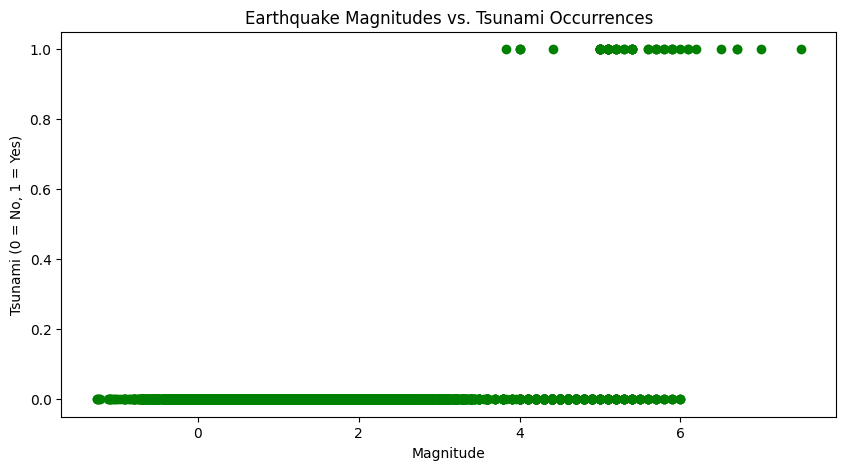

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(earthquakes['mag'], earthquakes['tsunami'], color='green')
plt.xlabel('Magnitude')
plt.ylabel('Tsunami (0 = No, 1 = Yes)')
plt.title('Earthquake Magnitudes vs. Tsunami Occurrences')
plt.show()

####Histogram

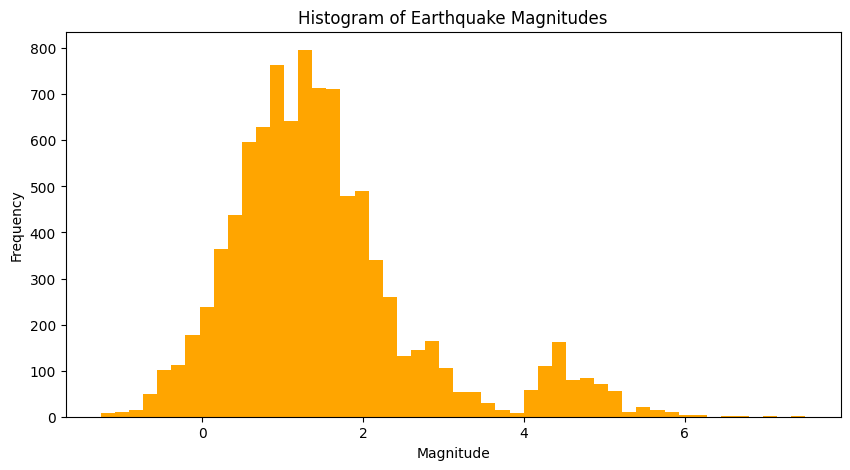

In [18]:
plt.figure(figsize=(10, 5))
plt.hist(earthquakes['mag'], bins=50, color='orange')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Histogram of Earthquake Magnitudes')
plt.show()

In [19]:
plt.savefig('Histogram_of_Earthquake_Magnitudes.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

###9.2 Plotting with Pandas



In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

earthquakes = pd.read_csv('/content/data/earthquakes.csv')
earthquakes['time'] = pd.to_datetime(earthquakes['time'], unit='ms')

####Line Plot

Text(0, 0.5, 'Magnitude')

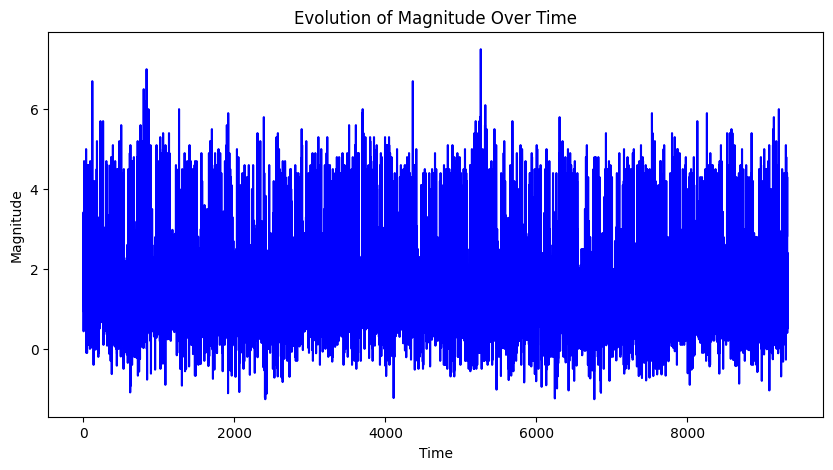

In [50]:
earthquakes.plot(kind='line',
                 y='mag',
                 figsize=(10, 5),
                 style='b-',
                 legend=False,
                 title='Evolution of Magnitude Over Time')
plt.xlabel('Time')
plt.ylabel('Magnitude')

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

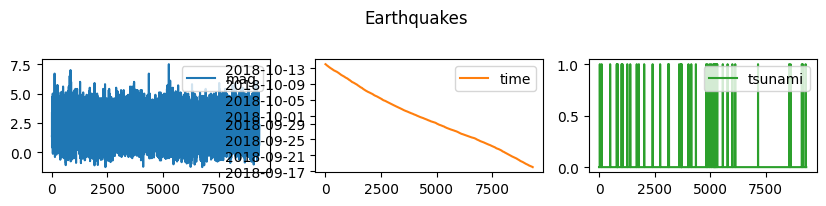

In [52]:
earthquakes.plot(kind='line',
                 subplots = True,
                 layout = (3, 3),
                 figsize = (10, 5),
                 title = 'Earthquakes')

####Scatter Plot

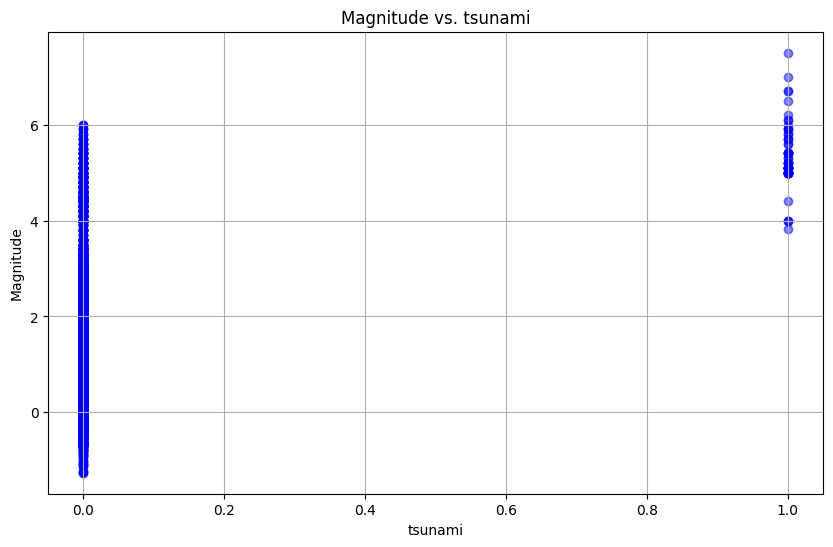

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(earthquakes['tsunami'], earthquakes['mag'], c='blue', alpha=0.5)
plt.title('Magnitude vs. tsunami')
plt.xlabel('tsunami')
plt.ylabel('Magnitude')
plt.grid(True)

####Hexbins

Text(0, 0.5, 'Magnitude')

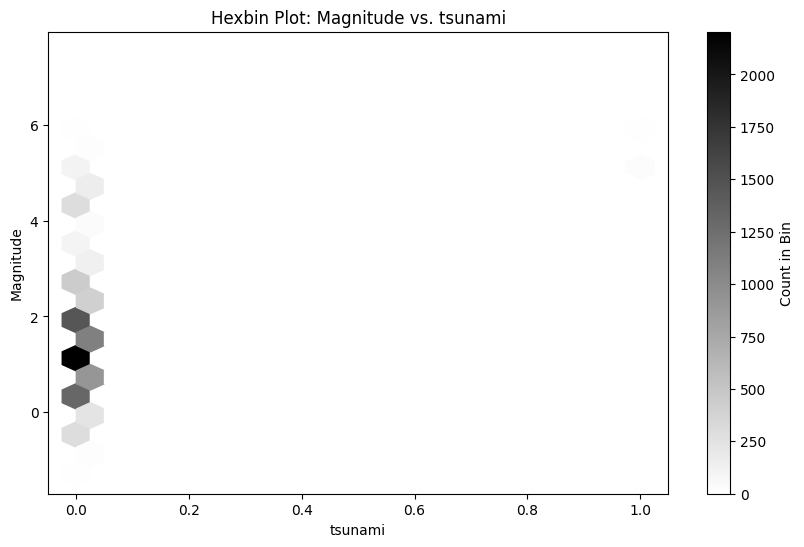

In [57]:
plt.figure(figsize=(10, 6))
plt.hexbin(earthquakes['tsunami'], earthquakes['mag'], gridsize=20, cmap='gray_r')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot: Magnitude vs. tsunami')
plt.xlabel('tsunami')
plt.ylabel('Magnitude')

####Histograms

Text(0.5, 0, 'Magnitude')

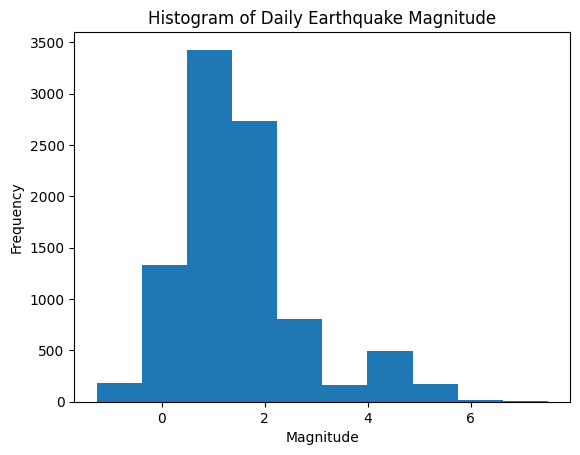

In [58]:
earthquakes.mag.plot(kind='hist',
                     title='Histogram of Daily Earthquake Magnitude')
plt.xlabel('Magnitude')

###9.3 Pandas Plotting Subpackage

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

earthquakes = pd.read_csv('/content/data/earthquakes.csv', index_col='time',parse_dates=True)
earthquakes.index = pd.to_datetime(earthquakes.index, unit='ms')

####Scatter Matrix

array([[<Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='tsunami', ylabel='mag'>],
       [<Axes: xlabel='mag', ylabel='tsunami'>,
        <Axes: xlabel='tsunami', ylabel='tsunami'>]], dtype=object)

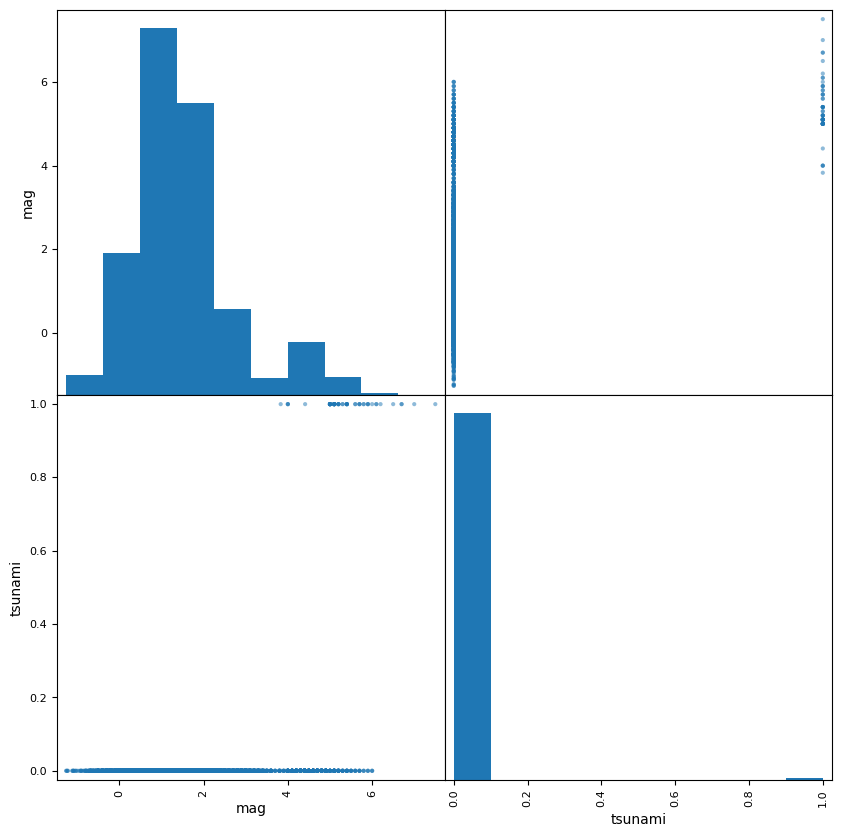

In [65]:
from pandas.plotting import scatter_matrix
scatter_matrix(earthquakes, figsize=(10, 10))

array([[<Axes: xlabel='mag', ylabel='mag'>,
        <Axes: xlabel='tsunami', ylabel='mag'>],
       [<Axes: xlabel='mag', ylabel='tsunami'>,
        <Axes: xlabel='tsunami', ylabel='tsunami'>]], dtype=object)

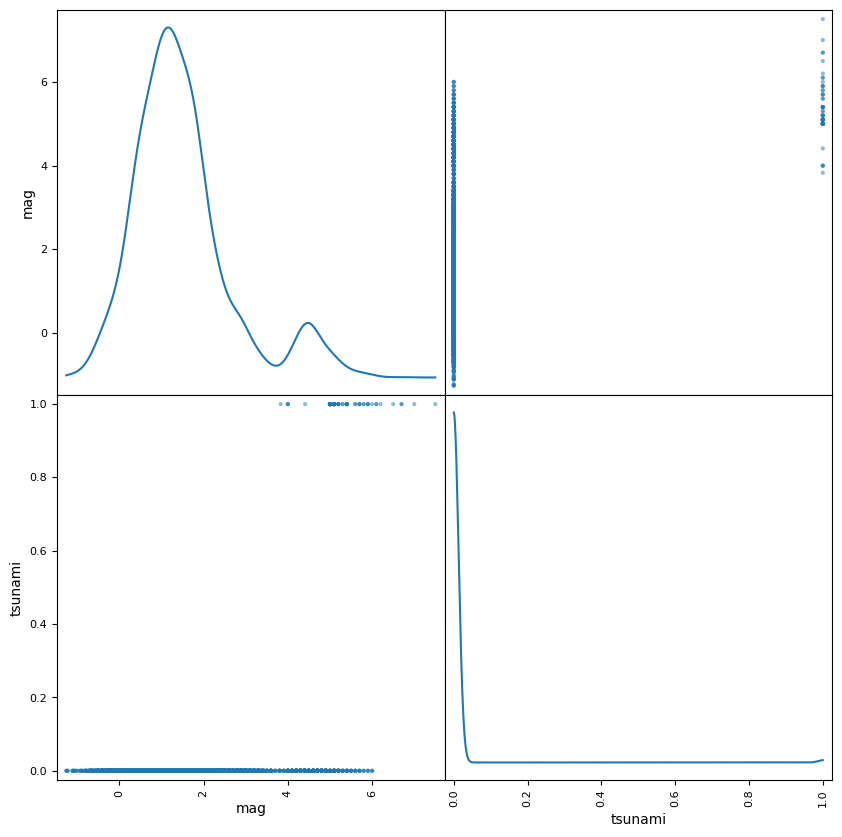

In [66]:
scatter_matrix(earthquakes, figsize=(10, 10), diagonal='kde')

####Lag Plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

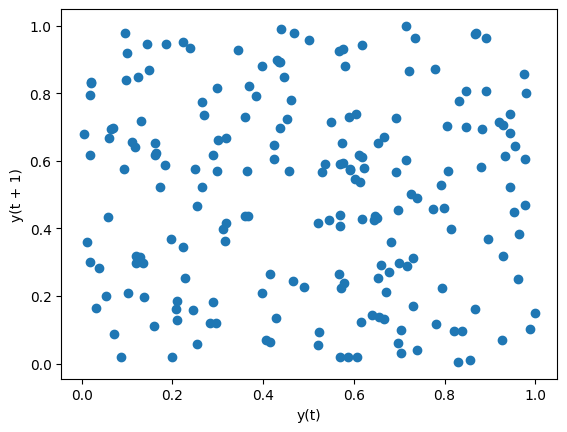

In [67]:
from pandas.plotting import lag_plot
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

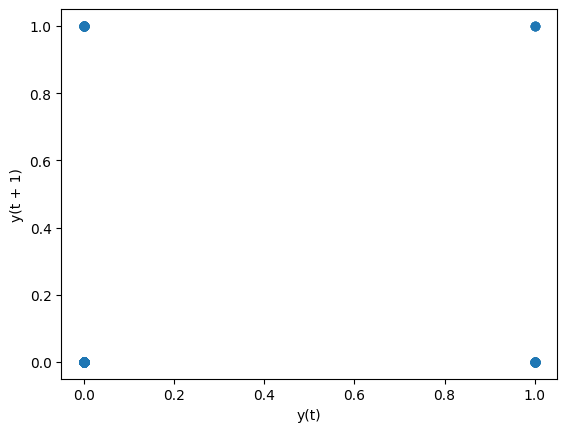

In [70]:
lag_plot(earthquakes.tsunami)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

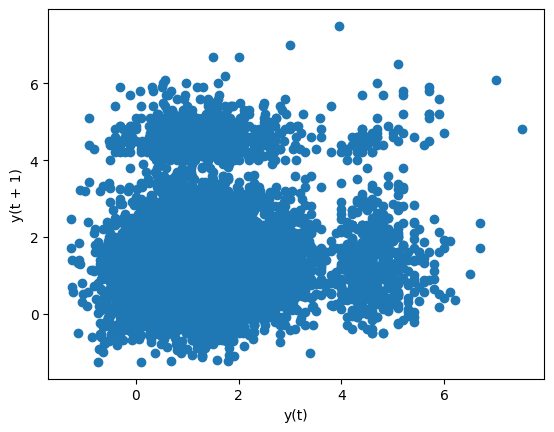

In [69]:
lag_plot(earthquakes.mag)

####Autocorrelation plots

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

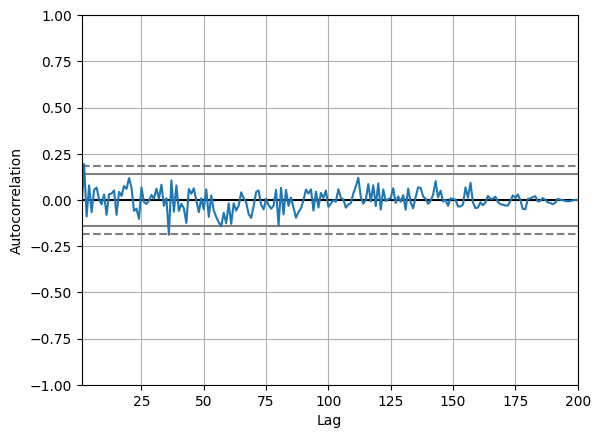

In [94]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0)
autocorrelation_plot(pd.Series(np.random.random(size=200)))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

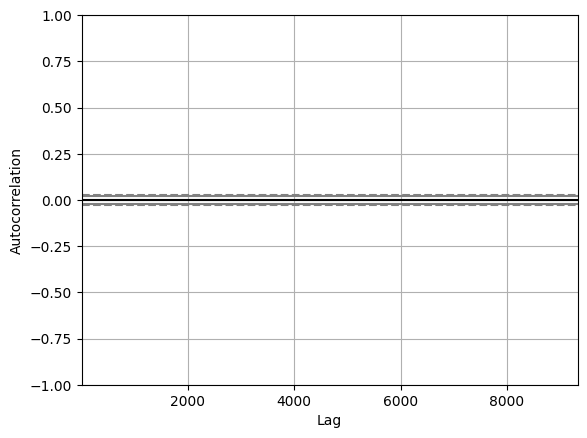

In [95]:
autocorrelation_plot(earthquakes.mag)

####Bootstrap Plot

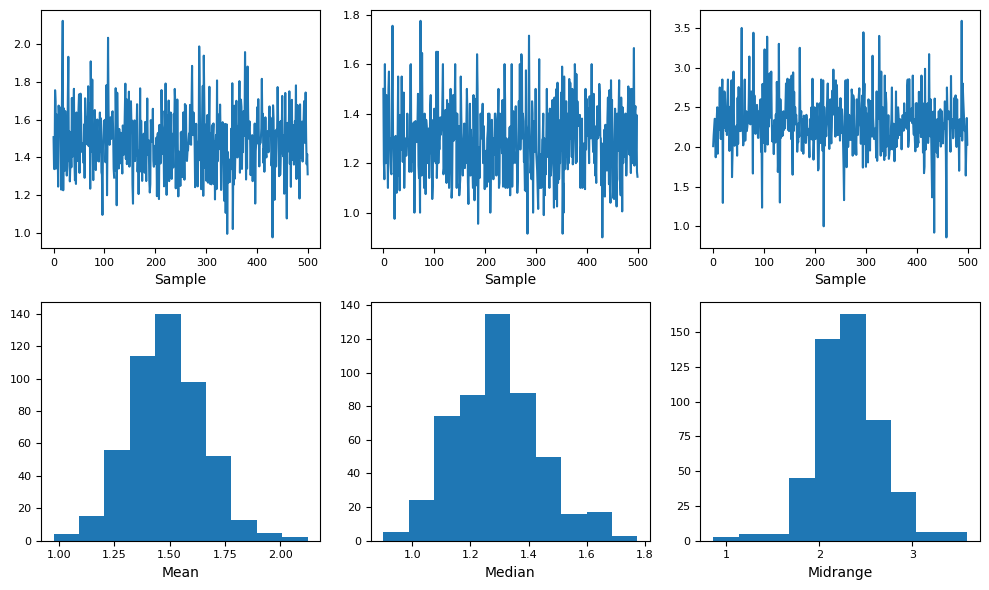

In [96]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(earthquakes.mag, fig=plt.figure(figsize=(10, 6)))

##Data Analysis:
Provide comments on output from the procedures above.
1. 9.1
    - From the output shown above, we can see plots using matplotlib for the earthquake.csv file, revealing to us the patterns and trends which would have otherwise taken a long time to identify without the use of these tools. We can use the line plot to see the date when the highest earthquake magnitude happened, the scatter plot to see the magnitude that which a tsunami occured — which in this case is clearly on above the magnitude of 3 — and the histogram to identify the frequency of the earthquakes' magnitudes.

2. 9.2
    - The same values are shown here, but this time we utilized the functions and methods in pandas.

3. 9.3
    - From the output shown above, we can immediately infer that the scatter matrix is a very useful tool in viewing the relationship between the magnitude and occurences of tsunami, which is the same as in the previous plots. We can then see in the autocorrelation plot that the plot looks straight near zero, suggesting that there is periodic behavior in the data.

##Supplementary Activity:

Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method.

2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.

3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.

4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single
line.

5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price:
  - The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).
  - The second subplot will be a bar plot showing the net effect this had monthly, using resample().
  - Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).
  - Bonus #2: Modify the x-axis of the bar plot to show the threeletter abbreviation for the month.


In [98]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('/content/data/fb_stock_prices_2018.csv', parse_dates=['date'], index_col='date')
earthquakes = pd.read_csv('/content/data/earthquakes.csv', parse_dates=['time'], index_col='time')

Text(0, 0.5, 'Closing Price')

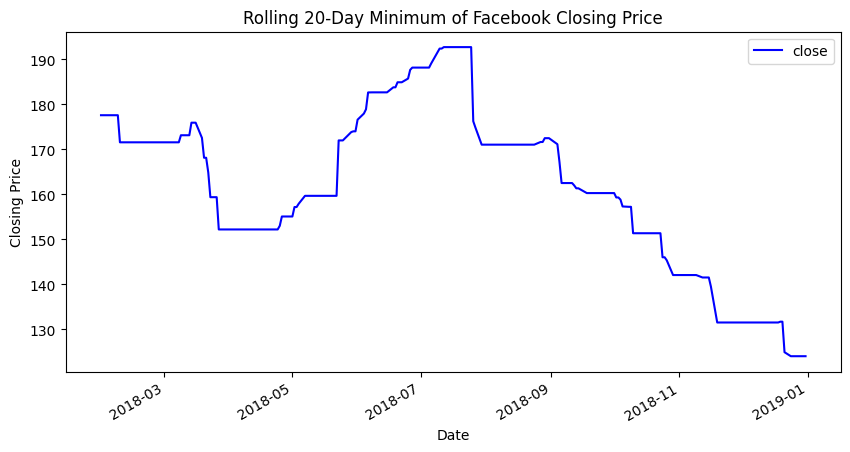

In [103]:
#1.
roling_20 = fb['close'].rolling(window=20).min()
roling_20.plot(kind='line',
        y='close',
        figsize=(10, 5),
        style='b-',
        legend=True,
        title='Rolling 20-Day Minimum of Facebook Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')

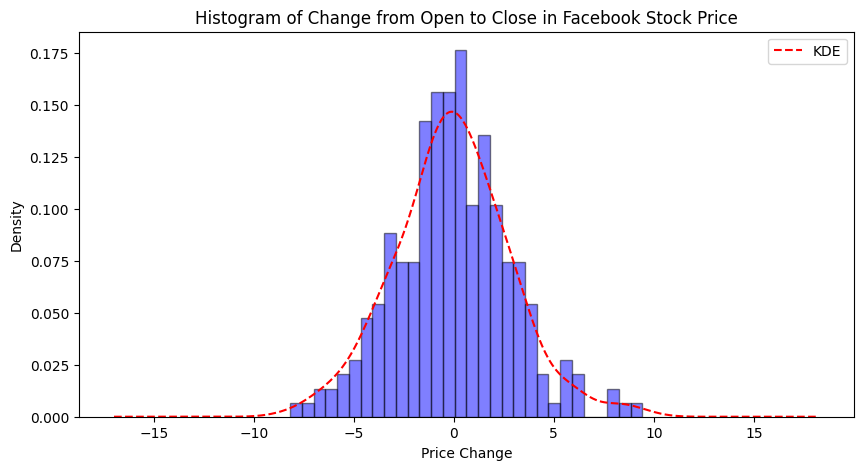

In [105]:
#2.
fb['change'] = fb['open'] - fb['close']
plt.figure(figsize=(10, 5))
plt.hist(fb['change'],
         bins=30,
         alpha=0.5,
         color='blue',
         edgecolor='black',
         density=True)
plt.title('Histogram of Change from Open to Close in Facebook Stock Price')
plt.xlabel('Price Change')
plt.ylabel('Density')

fb['change'].plot(kind='kde',
                        color='red',
                        linestyle='--',
                        label='KDE')
plt.legend()
plt.show()

Text(0, 0.5, 'Magnitude')

<Figure size 1000x500 with 0 Axes>

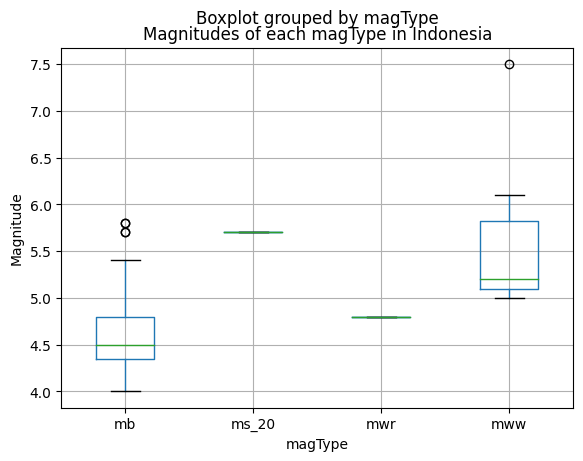

In [107]:
#3.
indonesia_earthquakes = earthquakes[earthquakes['parsed_place'] == 'Indonesia']
plt.figure(figsize=(10, 5))
indonesia_earthquakes.boxplot(column='mag', by='magType')
plt.title('Magnitudes of each magType in Indonesia')
plt.xlabel('magType')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Price Difference')

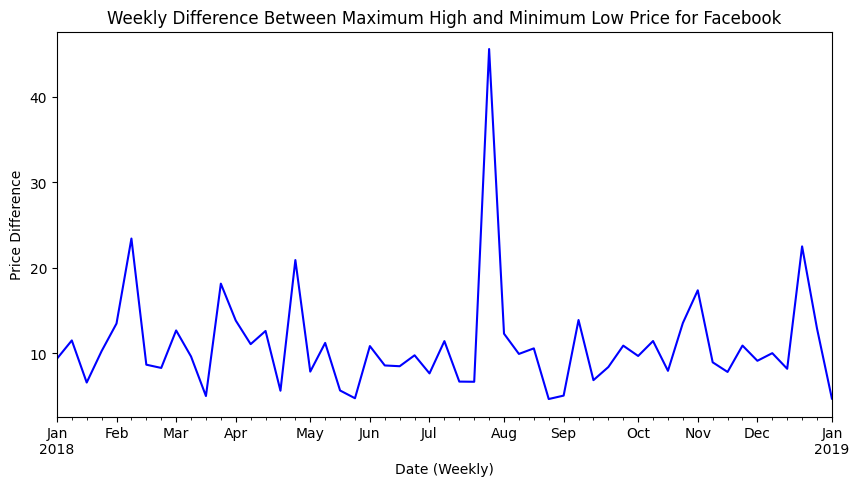

In [112]:
#4.
weekly_max_highPrice = fb['high'].resample('W').max()
weekly_min_lowPrice = fb['low'].resample('W').min()
difference = weekly_max_highPrice - weekly_min_lowPrice

plt.figure(figsize=(10, 5))
difference.plot(color='blue')
plt.title('Weekly Difference Between Maximum High and Minimum Low Price for Facebook')
plt.xlabel('Date (Weekly)')
plt.ylabel('Price Difference')

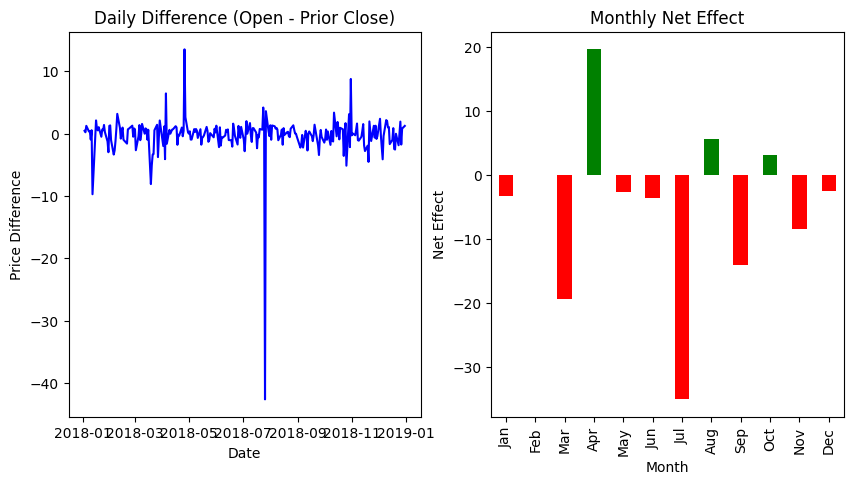

In [120]:
#5.
dailyPrior_difference = fb['open'] - fb['close'].shift(1)
difference_netEffect = dailyPrior_difference.resample('M').sum()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

def daily_linePlot():
  axes[0].plot(dailyPrior_difference.index, dailyPrior_difference, color='blue')
  axes[0].set_title('Daily Difference (Open - Prior Close)')
  axes[0].set_xlabel('Date')
  axes[0].set_ylabel('Price Difference')

def netEffect_barPlot():
  colors = ['green' if val >= 0 else 'red' for val in difference_netEffect]
  difference_netEffect.plot(kind='bar', ax=axes[1], color=colors)
  axes[1].set_title('Monthly Net Effect')
  axes[1].set_xlabel('Month')
  axes[1].set_ylabel('Net Effect')
  axes[1].set_xticklabels(difference_netEffect.index.strftime('%b'))

x = daily_linePlot()
y = netEffect_barPlot()

##Summary/Conclusion:

Provide a summary of your learnings and the conclusion for this activity.
- Through this activity, I have learned a lot in the field of visualizing data using the matplotlib and pandas libraries. I have learned how to create a diversity of different plots like line plots for analyzing trends, bar plots for comparing them, box plots for understanding how data are distributed, and KDE for visualizing the density of data. The activities in the procedure and supplementary not only enhanced my understanding of data visualization techniques but also helped handle data more effectively overall.